In [161]:
!pip install torchtext

In [162]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [163]:
data = pd.read_csv(r'D:\Kaggle-SMS-Spam-Collection-Dataset--master\Kaggle-SMS-Spam-Collection-Dataset--master\spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [164]:
data = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [165]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [166]:
data = data.rename(index= str, columns = {'v1': 'labels','v2':'text'})
data.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [167]:
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

In [168]:
train.reset_index(drop=True), test.reset_index(drop=True)

(     labels                                               text
 0       ham  No I'm in the same boat. Still here at my moms...
 1      spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
 2       ham     They r giving a second chance to rahul dengra.
 3       ham     O i played smash bros  &lt;#&gt;  religiously.
 4      spam  PRIVATE! Your 2003 Account Statement for 07973...
 ...     ...                                                ...
 4452    ham  I came hostel. I m going to sleep. Plz call me...
 4453    ham                             Sorry, I'll call later
 4454    ham      Prabha..i'm soryda..realy..frm heart i'm sory
 4455    ham                         Nt joking seriously i told
 4456    ham                In work now. Going have in few min.
 
 [4457 rows x 2 columns],
      labels                                               text
 0       ham  Funny fact Nobody teaches volcanoes 2 erupt, t...
 1       ham  I sent my scores to sophas and i had to do sec...
 2      spam

In [169]:
train.shape, test.shape

((4457, 2), (1115, 2))

In [170]:
train.to_csv('D:/Kaggle-SMS-Spam-Collection-Dataset--master/Kaggle-SMS-Spam-Collection-Dataset--master/train.csv', index=False)
test.to_csv('D:/Kaggle-SMS-Spam-Collection-Dataset--master/Kaggle-SMS-Spam-Collection-Dataset--master/test.csv', index=False)


In [171]:
!ls Kaggle-SMS-Spam-Collection-Dataset--master/Kaggle-SMS-Spam-Collection-Dataset--master


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [172]:
import numpy as np
import torch
import torchtext

from torchtext.data import Field, BucketIterator, TabularDataset

In [173]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [174]:
TEXT = torchtext.data.Field(tokenize = word_tokenize)

In [175]:
LABEL = torchtext.data.LabelField(dtype = torch.float)

In [176]:
datafields= [('labels', LABEL), ('text', TEXT)]

In [177]:
train, test = torchtext.data.TabularDataset.splits(path = 'D:/Kaggle-SMS-Spam-Collection-Dataset--master/Kaggle-SMS-Spam-Collection-Dataset--master',
                                                    train = 'train.csv',
                                                    test = 'test.csv',
                                                    format = 'csv' ,
                                                    skip_header = True,
                                                    fields = datafields)

In [178]:
train[:5]

In [179]:
print(len(train))
print(len(test))

4457
1115


In [180]:
train[5].__dict__.keys()


dict_keys(['labels', 'text'])

In [181]:
train[5].text

['G', 'says', 'you', 'never', 'answer', 'your', 'texts', ',', 'confirm/deny']

In [182]:
 TEXT.build_vocab(train, max_size = 10500)

In [183]:
LABEL.build_vocab(train)

In [184]:
print(len(TEXT.vocab))
print(len(LABEL.vocab))

10502
2


In [185]:
print(TEXT.vocab.freqs.most_common(50))

[('.', 3890), ('to', 1750), ('I', 1571), (',', 1468), ('you', 1460), ('?', 1256), ('!', 1134), ('a', 1067), ('...', 1007), ('the', 946), ('&', 772), ('i', 743), ('and', 669), ('in', 663), ('is', 646), (';', 641), ('u', 628), ('me', 586), (':', 570), ('for', 527), ('my', 494), ('of', 471), ('your', 461), ('it', 456), ('have', 395), ('on', 393), (')', 393), ('2', 390), ('that', 384), ("'s", 383), ("'m", 320), ('now', 317), ('are', 316), ('do', 311), ('call', 307), ('at', 301), ('or', 298), ('U', 295), ('not', 294), ("n't", 281), ('be', 275), ('lt', 267), ('gt', 267), ('with', 267), ('get', 265), ('will', 263), ('so', 252), ('#', 245), ('can', 243), ('ur', 237)]


In [186]:
 print(TEXT.vocab.itos[:10])

['<unk>', '<pad>', '.', 'to', 'I', ',', 'you', '?', '!', 'a']


In [187]:
print(LABEL.vocab.stoi)

defaultdict(None, {'ham': 0, 'spam': 1})


In [188]:
 batch_size = 64
    
train_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train, test),
    batch_size = batch_size,
    sort_key = lambda x : len(x.text),
    sort_within_batch = False)

In [189]:
import torch.nn as nn


In [191]:
class RNN(nn.Module): #inherits from the base nn class
    
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):#input parameters give the size of the feature vectors
        super().__init__() #this class could be extended using super and __init__ is used as a constructor to initialise the class
        self.embedding = nn.Embedding(input_dim, embedding_dim) #it converts one-hot encoding to dense format (building relation ship with surroundings)
        #LSTM is used instead of RNN because LSTM tend to perform better than RNN
        self.rnn = nn.LSTM(embedding_dim, hidden_dim) #RNN neural network 
        self.fc = nn.Linear(hidden_dim, output_dim) #last fully connected layers, prediction of the text spam or ham
        self.dropout = nn.Dropout(0.3) #Dropout layer prevent overfitting on the training data
        
        
    def forward(self, text): #Forward path applied to the text SMS text message
        embedded = self.embedding(text) # Words will be converted in to dense form of network
        output, (hidden, _) = self.rnn(embedded) # fed in to RNN where final hidden satate which will be fed to the linear layer
        hidden_1D = hidden.squeeze(0) #last hidden state
        assert torch.equal(output[-1, :, :], hidden_1D) # confirm last hiddeen state
        return self.fc(hidden_1D)#feed into fully connected rnn

In [192]:
input_dim = len(TEXT.vocab) #pass the input text

embedding_dim = 100

hidden_dim = 256

output_dim = 1 #0 reperent ham 1 represent spam

In [193]:
model = RNN(input_dim, embedding_dim, hidden_dim, output_dim) # pass in alll the data to RNN model
print(model)

RNN(
  (embedding): Embedding(10502, 100)
  (rnn): LSTM(100, 256)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)


In [194]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr = 1e-6) #optimize the data with Adam optimizer with the learning rate of 10 power -6

In [195]:
criterion = nn.BCEWithLogitsLoss()#Cross-entropy loss in order to range the value from 0 to 1
print(criterion)

BCEWithLogitsLoss()


In [196]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss =0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad() #we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. This is convenient while training RNNs,  gradient descent to find local max and min
        predictions = model(batch.text).squeeze(1) # predictions are passed in batch, squeeze is used to make one dimensional data
        loss = criterion(predictions, batch.labels)# loss identification
        
        rounded_preds = torch.round(torch.sigmoid(predictions)) #to range the value between 0 to 1
        correct = (rounded_preds == batch.labels).float()
        
        acc = correct.sum() / len(correct) #accuracy is calculated for the whole batch
        
        loss.backward() #backward propogation
        
        optimizer.step() #backward propogation
        
        epoch_loss += loss.item() #upgrade the epoch loss for every batch
        epoch_acc += acc.item()   #upgrade the accuracy
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator) #summed to get the epoch_loss and epoch_accuracy


In [197]:
num_epochs = 5

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    print(f'|Epoch:{epoch+1:02} | Train Loss:{train_loss:.3f} | Train Acc:{train_acc*100:.2f}%')

|Epoch:01 | Train Loss:0.643 | Train Acc:86.30%
|Epoch:02 | Train Loss:0.630 | Train Acc:86.38%
|Epoch:03 | Train Loss:0.619 | Train Acc:86.35%
|Epoch:04 | Train Loss:0.607 | Train Acc:86.32%
|Epoch:05 | Train Loss:0.596 | Train Acc:86.41%


In [198]:
epoch_loss = 0
epoch_acc = 0


model.eval()

RNN(
  (embedding): Embedding(10502, 100)
  (rnn): LSTM(100, 256)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)

In [199]:
def test(model, iterator):
    
    epoch_loss =0
    epoch_acc = 0
    
    model.eval()
    torch.no_grad()
    
    for batch in iterator:
        
        
        predictions = model(batch.text).squeeze(1) # predictions are passed in batch, squeeze is used to make one dimensional data
        loss = criterion(predictions, batch.labels)# loss identification
        
        rounded_preds = torch.round(torch.sigmoid(predictions)) #to range the value between 0 to 1
        correct = (rounded_preds == batch.labels).float()
        
        acc = correct.sum() / len(correct) #accuracy is calculated for the whole batch
        
        epoch_loss += loss.item() #upgrade the epoch loss for every batch
        epoch_acc += acc.item()   #upgrade the accuracy
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator) #summed to get the epoch_loss and epoch_accuracy


In [200]:
num_epochs = 5

for epoch in range(num_epochs):
    test_loss, test_acc = test(model, test_iterator)
    print(f'|Epoch:{epoch+1:02} | Test Loss:{test_loss:.3f} | Train Acc:{test_acc*100:.2f}%')


|Epoch:01 | Test Loss:0.649 | Train Acc:76.82%
|Epoch:02 | Test Loss:0.649 | Train Acc:76.82%
|Epoch:03 | Test Loss:0.649 | Train Acc:76.82%
|Epoch:04 | Test Loss:0.649 | Train Acc:76.82%
|Epoch:05 | Test Loss:0.649 | Train Acc:76.82%


In [201]:
import tqdm

train_loss, train_acc = [], []
test_loss, test_acc = [], []

for i in tqdm.tnrange(100):
    loss, accuracy = train(model, train_iterator, optimizer, criterion)
    train_loss.append(loss)
    train_acc.append(accuracy)
    loss, accuracy = test(model, test_iterator)
    test_loss.append(loss)
    test_acc.append(accuracy)
   



C:\Users\Computer\anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


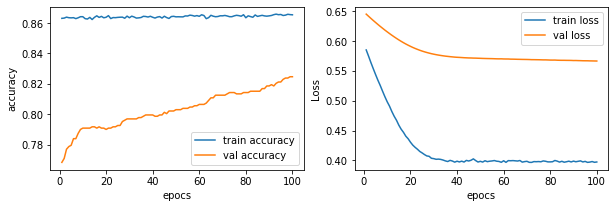

In [202]:

def plot(train_acc, train_loss, test_acc, test_loss, epochs):
  fig, axes = plt.subplots(1, 2, figsize=(10, 3))
  plt.sca(axes[0])

  axes[0].set_xlabel('epocs')
  axes[0].set_ylabel('accuracy')

  axes[0].plot(range(1, epochs+1), train_acc, label = "train accuracy")
  axes[0].plot(range(1, epochs+1), test_acc, label = "val accuracy")
               
  axes[0].legend()

  plt.sca(axes[1])
  axes[1].set_xlabel('epocs')
  axes[1].set_ylabel('Loss')

  axes[1].plot(range(1, epochs+1), train_loss, label = "train loss")
  axes[1].plot(range(1, epochs+1), test_loss, label = "val loss")
  axes[1].legend()
  plt.show()

# plot graph before normalization
plot(train_acc, train_loss, test_acc, test_loss, 100)